# 1. 연관성 규칙 (Association Rule)

### 개념
1. 둘 이상의 거래나 사건에 포함되어 있는 항목들의 관련성을 파악하는 탐색적 데이터 분석 기법
2. 종속변수 Y가 없는 비지도 학습 기법
3. 고객의 장바구니를 살펴봄으로써 거래되는 상품들의 연관성을 발견하는 것과 유사하여 '장바구니 분석'이라고 불림
4. 거래가 일어난 품목에 대해서만 적용 가능

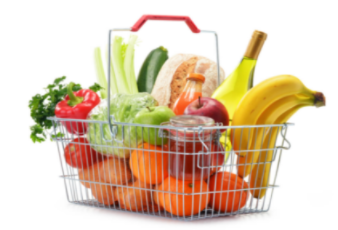


### 종류
1. Useful Result: 마케팅 전략상 유용한 결과가 나온 경우
 - 목요일 소매점을 찾는 남자 고객은 기저귀와 맥주를 함께 구매하는 경향이 있음
 
 
2. Trivial Result: 기존의 마케팅 전략에 의해 연관성이 높게 나온 경우
 - 한 회사의 전자제품을 구매하던 고객은 전자제품을 살 때 같은 회사의 제품을 사는 경향이 있음
 
 
3. Inexplicable Result: 의미를 발견하기 위해 많은 고민이 필요한 경우
 - 새로 문을 연 건축자재점에서는 변기 덮개가 가장 많이 팔리는 경향이 있음

### 연관성 평가 측도
1. 지지도
* 전체 자료에서 관련성이 있다고 판단되는 품목들을 포함하고 있는 거래나 사건의 확률
* 상호 대칭적 성질
* 0~1 사이의 값을 지님
* 지지도만 가지고 연관성을 평가 X

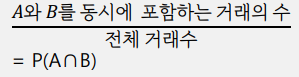


2. 신뢰도
* 항목 A를 구매하였을 경우, 항목 B를 구매하는 확률
* 상호 비대칭적 성질
* 0~1 사이의 값을 지님
* 신뢰도가 높을수록 연관성이 높다고 볼 수 있음

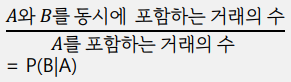    

3. 지지도 & 신뢰도 예시  
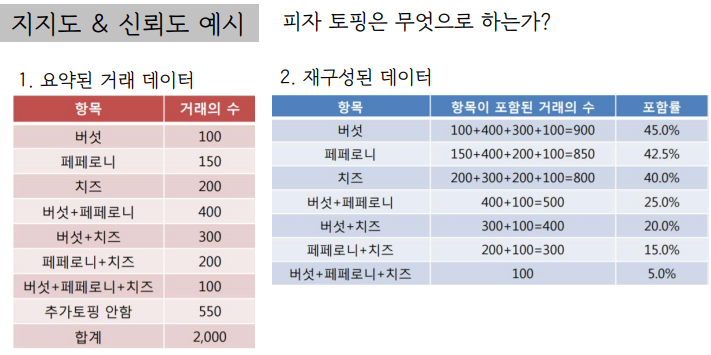  
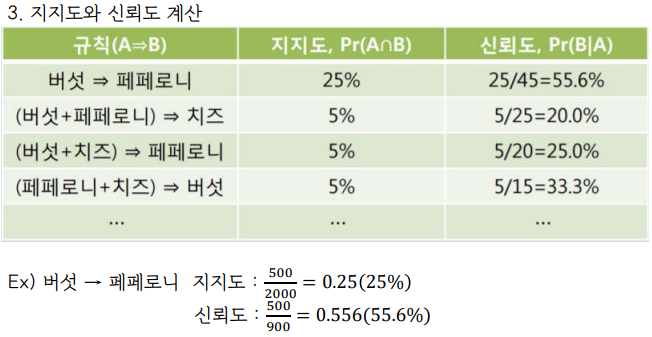

4. 향상도
* 우연에 의한 연관성의 정도를 재기 위해 사용하는 측도
* 0보다 큰 값을 지님
* 향상도 > 1 : 두 품목이 양의 연관성을 가짐
* 향상도 = 1 : 독립에 가까운 사건
* 향상도 < 1 : 두 품목이 음의 연관성을 가짐
* 신뢰도가 높다고 하더라도 향상도가 1에 가까우면 우연에 의해 연관성이 높게 나타났을 가능성이 있음  

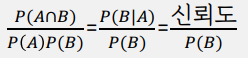

5. 향상도 예시  
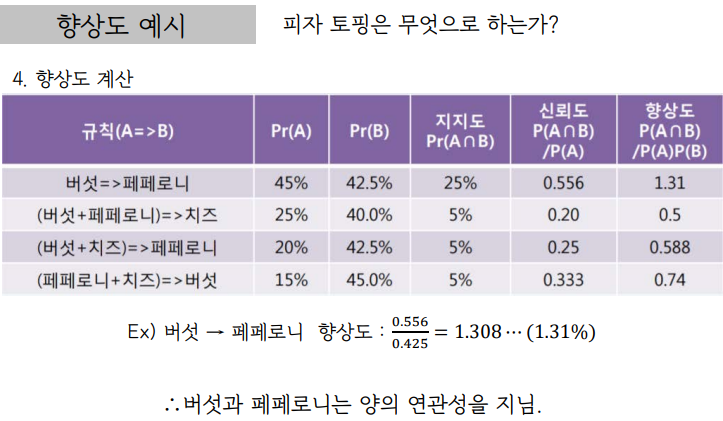

### 시차 연관성 규칙
1. 시간이 지남에 따라 어떤 소비형태를 보이는가에 대한 분석
2. 원인과 결과의 형태로 해석이 가능해서 결과가 유용하게 쓰임  

# 2. 협업 필터링 (Collaborative Filtering)

### 개념
1. 많은 사용자들로부터 얻은 기호정보에 따라 사용자들의 관심사를 자동으로 예측해주는 방법
2. 유클리디안 유사도, 코사인 유사도 등을 통해 대상 간의 유사도를 계산함  
3. 관심이 저조한 항목들에 대해서는 정보 부족으로 인한 한계가 있음
4. 데이터가 누적되기 전인 초기에는 정보 부족의 문제를 가짐 (아무런 행동을 하지 않은 신규 사용자에게는 어떠한 아이템도 추천할 수 없음)
5. 새로운 항목 추천의 한계가 있음 (새로운 아이템이 출시되더라도 이를 추천할 수 있는 정보가 없음)  
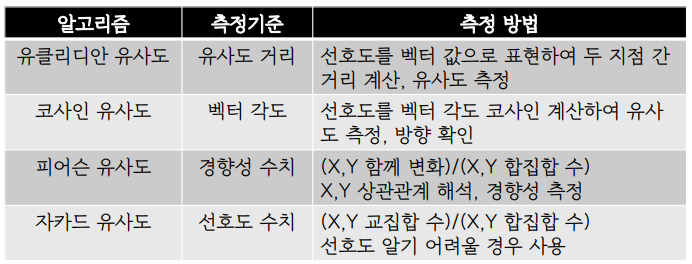

### 종류
1. 사용자 기반 (User Based Collaborative Filtering)
 - 나와 비슷한 성향을 지닌 사용자를 기반으로, 그 사람이 구매한 상품을 추천


2. 아이템 기반 (Item Based Collaborative Filtering)
 - 내가 이전에 구매했던 아이템들을 기반으로, 그 상품과 유사한 다른 상품을 추천

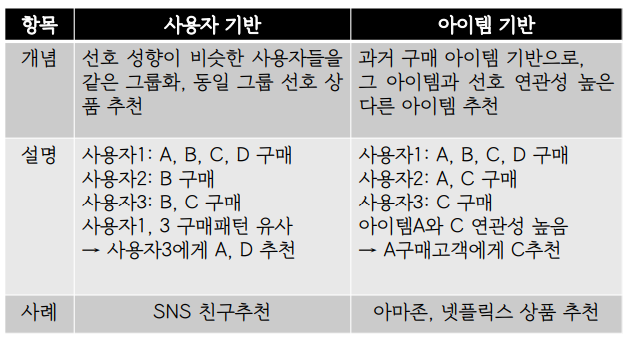  
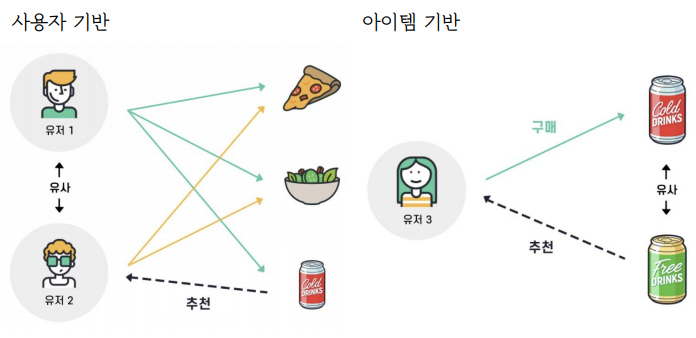

# 3. 실습 (Association Rule)

### 필요한 모듈 Import

In [5]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings("ignore")

### 데이터 탐색

In [38]:
shopping = pd.read_csv('Shopping.csv')

In [39]:
#57행의 데이터셋, 변수는 총 2개
shopping

,Customer,Item
0,Anne,Milk
1,Anne,Cheese
2,Anne,Cake
3,Anne,Pizza
4,Anne,Icecream
5,Anne,Pancake
6,Bob,Milk
7,Bob,Cheese
8,Bob,Pizza
9,Bob,Icecream


### 데이터 전처리

In [40]:
#구매자 목록을 리스트로 만듦
customer = list(shopping['Customer'].unique())

In [41]:
#각각의 구매자가 구매한 상품을 리스트 형태로 만듦
shopping_arr=[[]for i in range(len(shopping['Customer'].unique()))]

for i in range(len(customer)):
    for j in range(len(shopping)):
        if shopping['Customer'][j] == customer[i]:
            shopping_arr[i].append(shopping['Item'][j])

In [42]:
shopping_arr

[['Milk', 'Cheese', 'Cake', 'Pizza', 'Icecream', 'Pancake'],
 ['Milk', 'Cheese', 'Pizza', 'Icecream'],
 ['Milk', 'Cheese', 'Icecream', 'Cake'],
 ['Milk', 'Cheese', 'Pizza', 'Sandwich', 'Juice'],
 ['Cake', 'Pizza', 'Juice'],
 ['Sandwich', 'Pizza', 'Meat', 'Cheese', 'Juice', 'Icecream'],
 ['Waffle', 'Pancake', 'Cheese'],
 ['Salad', 'Pizza', 'Coke', 'Waffle', 'Pancake'],
 ['Potato', 'Coke', 'Sandwich', 'Milk'],
 ['Juice', 'Apple', 'Potato', 'Pancake', 'Milk', 'Juice', 'Cake', 'Cheese'],
 ['Coffee', 'Pizza', 'Sandwich'],
 ['Coffee', 'Juice', 'Bread'],
 ['Bread', 'Cheese', 'Coffee']]

In [43]:
#연관성분석을 진행하기 위해 리스트를 데이터프레임의 형태로 변환함
#각 상품에 대해 구매했으면 True, 미구매했으면 False로 입력함
te = TransactionEncoder()
te_ary = te.fit(shopping_arr).transform(shopping_arr)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [44]:
#구매자의 이름을 인덱스로 설정함
df['name'] = customer
df.set_index('name', inplace=True)

In [45]:
df

,Apple,Bread,Cake,Cheese,Coffee,Coke,Icecream,Juice,Meat,Milk,Pancake,Pizza,Potato,Salad,Sandwich,Waffle
name,,,,,,,,,,,,,,,,
Anne,False,False,True,True,False,False,True,False,False,True,True,True,False,False,False,False
Bob,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False
Chris,False,False,True,True,False,False,True,False,False,True,False,False,False,False,False,False
Harry,False,False,False,True,False,False,False,True,False,True,False,True,False,False,True,False
Tom,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False
Emma,False,False,False,True,False,False,True,True,True,False,False,True,False,False,True,False
Sam,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
Jane,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False,True
Sally,False,False,False,False,False,True,False,False,False,True,False,False,True,False,True,False


### 연관성분석

In [53]:
#지지도가 0.3 이상인 조합만 출력
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.307692,(Cake)
1,0.615385,(Cheese)
2,0.307692,(Icecream)
3,0.384615,(Juice)
4,0.461538,(Milk)
5,0.307692,(Pancake)
6,0.538462,(Pizza)
7,0.307692,(Sandwich)
8,0.307692,"(Icecream, Cheese)"
9,0.384615,"(Milk, Cheese)"


In [56]:
#위에서 출력한 조합 중 향상도가 1 이상인 조합만 출력
association_rules(frequent_itemsets, metric="lift", min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Icecream),(Cheese),0.307692,0.615385,0.307692,1.000000,1.625000,0.118343,inf
1,(Cheese),(Icecream),0.615385,0.307692,0.307692,0.500000,1.625000,0.118343,1.384615
2,(Milk),(Cheese),0.461538,0.615385,0.384615,0.833333,1.354167,0.100592,2.307692
3,(Cheese),(Milk),0.615385,0.461538,0.384615,0.625000,1.354167,0.100592,1.435897


### 결론

#### 실습에 사용한 데이터는 실습을 위해 본인이 직접 만든 데이터로, 구매자 이름과 상품으로 이루어진 형태의 데이터이다.

각 구매자의 구매내역을 바탕으로 각 물품과 물품들의 조합에 대한 지지도, 신뢰도, 향상도를 구하였다. 지지도는 전체 구매 중 해당 상품 혹은 해당 상품들의 조합이 얼마나 많은 비중을 차지하고 있는지를 의미한다. 신뢰도와 향상도가 높으면서 지지도가 높다면 해당 조합은 강력하게 추천할만한 조합이라고 볼 수 있다. 본 실습의 결과 최종 선택된 조합 중 Icecream -> Cheese와 Milk -> Cheese는 향상도가 1 이상이면서 신뢰도도 높은 수준을 보여주고있다. 즉, Icecream을 구매한 구매자에게는 Cheese를, Milk를 구매한 구매자에게도 Cheese를 추천해줄 수 있다.

# 4. 실습 (Collaborative Filtering)

### 필요한 모듈 Import

In [60]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore")

### 데이터 탐색

In [115]:
book = pd.read_csv('CharlesBookClub.csv')

In [117]:
#4000행의 데이터셋, 변수는 총 10개
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt
0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,1.0,2.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3996,1.0,1.0,2.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN
3997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3998,1.0,1.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
#모든 변수에 결측값이 존재함을 확인
book.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt
count,1576.000000,953.000000,1662.000000,1019.000000,819.000000,892.000000,1067.000000,430.000000,130.000000,173.000000
mean,1.623731,1.279119,1.759928,1.376840,1.251526,1.295964,1.452671,1.165116,1.153846,1.057803
std,0.954812,0.570414,1.022684,0.667292,0.525843,0.560449,0.751708,0.413290,0.362197,0.234049
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,2.000000,2.000000,1.000000,1.250000,2.000000,1.000000,1.000000,1.000000
max,7.000000,5.000000,7.000000,5.000000,4.000000,5.000000,6.000000,3.000000,2.000000,2.000000


### 데이터 전처리

In [67]:
#결측값을 모두 0으로 대체
book.fillna(0, inplace = True)
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3996,1.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0
3997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3998,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
#행과 열을 전환
book_t = book.transpose()
book_t

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
ChildBks,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
YouthBks,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
CookBks,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0
DoItYBks,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
RefBks,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
ArtBks,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
GeogBks,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
ItalCook,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ItalAtlas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ItalArt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
#책 종류를 리스트로 생성
booklist = list(book_t.index)
booklist

['ChildBks',
 'YouthBks',
 'CookBks',
 'DoItYBks',
 'RefBks',
 'ArtBks',
 'GeogBks',
 'ItalCook',
 'ItalAtlas',
 'ItalArt']

In [98]:
#코사인 유사도 행렬 생성
cf = cosine_similarity(book_t)
cf

array([[1.        , 0.45257955, 0.5829775 , 0.48170028, 0.43138169,
        0.2914774 , 0.41506183, 0.25983755, 0.20957149, 0.25437623],
       [0.45257955, 1.        , 0.49202604, 0.39075551, 0.3400062 ,
        0.25618067, 0.3801569 , 0.19853421, 0.19130371, 0.19806474],
       [0.5829775 , 0.49202604, 1.        , 0.49996923, 0.45512797,
        0.30067539, 0.42839659, 0.29621421, 0.24043845, 0.24952957],
       [0.48170028, 0.39075551, 0.49996923, 1.        , 0.358443  ,
        0.26417324, 0.34381219, 0.1981184 , 0.19311782, 0.21844966],
       [0.43138169, 0.3400062 , 0.45512797, 0.358443  , 1.        ,
        0.27533793, 0.32767047, 0.16270006, 0.27640144, 0.18609923],
       [0.2914774 , 0.25618067, 0.30067539, 0.26417324, 0.27533793,
        1.        , 0.28677392, 0.20262618, 0.09118706, 0.21472164],
       [0.41506183, 0.3801569 , 0.42839659, 0.34381219, 0.32767047,
        0.28677392, 1.        , 0.19206405, 0.1588847 , 0.16816475],
       [0.25983755, 0.19853421, 0.2962142

In [99]:
#코사인 유사도 행렬을 데이터프레임 형태로 생성
cf = pd.DataFrame(data = cf, index = booklist, columns = booklist)
cf

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt
ChildBks,1.000000,0.452580,0.582977,0.481700,0.431382,0.291477,0.415062,0.259838,0.209571,0.254376
YouthBks,0.452580,1.000000,0.492026,0.390756,0.340006,0.256181,0.380157,0.198534,0.191304,0.198065
CookBks,0.582977,0.492026,1.000000,0.499969,0.455128,0.300675,0.428397,0.296214,0.240438,0.249530
DoItYBks,0.481700,0.390756,0.499969,1.000000,0.358443,0.264173,0.343812,0.198118,0.193118,0.218450
RefBks,0.431382,0.340006,0.455128,0.358443,1.000000,0.275338,0.327670,0.162700,0.276401,0.186099
ArtBks,0.291477,0.256181,0.300675,0.264173,0.275338,1.000000,0.286774,0.202626,0.091187,0.214722
GeogBks,0.415062,0.380157,0.428397,0.343812,0.327670,0.286774,1.000000,0.192064,0.158885,0.168165
ItalCook,0.259838,0.198534,0.296214,0.198118,0.162700,0.202626,0.192064,1.000000,0.169821,0.219058
ItalAtlas,0.209571,0.191304,0.240438,0.193118,0.276401,0.091187,0.158885,0.169821,1.000000,0.188398
ItalArt,0.254376,0.198065,0.249530,0.218450,0.186099,0.214722,0.168165,0.219058,0.188398,1.000000


### Item Based Collaborative Filtering

In [112]:
#하나의 책 종류를 입력하면 코사인 유사도가 높은 상위 5개 항목을 출력해주는 함수
def get_cf(kind):
    return cf[kind].sort_values(ascending = False)[1:6]

In [113]:
recommend = pd.DataFrame(data = get_cf('ChildBks'))
recommend

,ChildBks
CookBks,0.582977
DoItYBks,0.481700
YouthBks,0.452580
RefBks,0.431382
GeogBks,0.415062


### 결론

#### 실습에 사용한 데이터는 책 구매내역 데이터로, 각 구매자가 책을 종류별로 몇 권 구매하였는지가 입력되어있는 데이터이다.

본 실습의 결과, 어린이 책을 의미하는 ChildBks와 코사인 유사도가 크게 나온 상위 3개 항목은 요리책을 의미하는 CookBks, Do It Yourself 책을 의미하는 DoItYBks, 청소년 책을 의미하는 YouthBks이다. 어린이 책을 구매하는 사람들은 통상 주부로, 요리 또는 집에서 손수 만들 수 있는 물품, 청소년 책 등에 관심을 가질 확률이 높다. 실제로 이러한 추측을 뒷받침하는 추천 결과가 도출되었다. 유사도에는 코사인 유사도 외에도 피어슨 유사도 등 여러가지 방법이 있는데, 본 실습에서는 코사인 유사도를 사용했다.